# Project 2 - Ames Housing Data and Kaggle Challenge

## Part 4 - LASSO Regression no Train/Test Split + Power Transform + Removal Outliers


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import r2_score

%matplotlib inline

In [4]:
# Set Display Range
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
# Load Data from Part 2
%store -r df_train
%store -r X_tr
%store -r X_te
%store -r y_tr
%store -r y_tr_log

### 4.1 Feature Selection

> Selected Feature for further tuning below:

**Feature**|**Beta**
:-----:|:-----:
overall\_qual|21125.90862
total\_bsmt\_sf|4472.870361
gr\_liv\_area|18519.20008
bsmt\_full\_bath|715.869773
full\_bath|708.268807
fireplaces|2472.700521
garage\_cars|6615.962124
neighborhood|-2202.575907
bldg\_type\_1fam|956.324511
exter\_qual|1823.557199
bsmt\_qual|6313.944549
bsmt\_exposure|4474.63341
heating\_qc|1283.930321
kitchen\_qual|8635.439995
big\_house|-1492.272325

In [6]:
# Feature by Group
feat_num = [ #'lot_frontage',
            'lot_area_log',
            'overall_qual',
            'total_bsmt_sf',
            'gr_liv_area_power',
            'bsmt_full_bath',
            'bsmtfin_sf_1',# maybe
            'full_bath',
            'fireplaces',
            'garage_cars',
            'street_pave',
            'overall_cond',
#             'house_age'
          ]

feat_bldg_type = ['bldg_type_1fam',
                  'bldg_type_duplex',
                  'bldg_type_twnhs',
                  'bldg_type_twnhse'
                 ]

feat_neighborhood = ['neighborhood_blmngtn',
                     'neighborhood_blueste',
                     'neighborhood_brdale',
                     'neighborhood_brkside',
                     'neighborhood_clearcr',
                     'neighborhood_collgcr',
                     'neighborhood_crawfor',
                     'neighborhood_edwards',
                     'neighborhood_gilbert',
                     'neighborhood_greens',
                     'neighborhood_grnhill',
                     'neighborhood_idotrr',
                     'neighborhood_landmrk',
                     'neighborhood_mitchel',
                     'neighborhood_names',
                     'neighborhood_npkvill',
                     'neighborhood_nwames',
                     'neighborhood_noridge',
                     'neighborhood_nridght',
                     'neighborhood_oldtown',
                     'neighborhood_swisu',
                     'neighborhood_sawyer',
                     'neighborhood_sawyerw',
                     'neighborhood_somerst',
                     'neighborhood_stonebr',
                     'neighborhood_timber',
                     'neighborhood_veenker'
                     ]

feat_exter_qual = ['exter_qual_ex',
                   'exter_qual_gd',
                   'exter_qual_ta'
                  ]

feat_bsmt_qual = ['bsmt_qual_ex',
                  'bsmt_qual_fa',
                  'bsmt_qual_gd',
                  'bsmt_qual_ta'
                 ]

feat_bsmt_exposure = ['bsmt_exposure_av',
                      'bsmt_exposure_gd',
                      'bsmt_exposure_mn'
                     ]

feat_heating_qc = ['heating_qc_ex',
                   'heating_qc_fa',
                   'heating_qc_gd',
                   'heating_qc_ta'
                  ]

feat_kitchen_qual = ['kitchen_qual_ex',
                     'kitchen_qual_gd',
                     'kitchen_qual_po',
                     'kitchen_qual_ta'
                    ]
feat_zoning = ['ms_zoning_fv',
               'ms_zoning_rh',
               'ms_zoning_rl',
               'ms_zoning_rm'
               ]

feat_yr_sold = ['yr_sold_2006',
                'yr_sold_2007',
                'yr_sold_2008',
                'yr_sold_2009'
               ]

feat_condition_1 = ['condition_1_feedr',
                    'condition_1_norm',
                    'condition_1_posa',
                    'condition_1_posn',
                    'condition_1_rrae',
                    'condition_1_rran',
                    'condition_1_rrne',
                    'condition_1_rrnn'
                   ]

feat_exterior_qual = ['exter_qual_ex',
                      'exter_qual_gd',
                      'exter_qual_ta'
                     ]

feat_exterior_1st = ['exterior_1st_asbshng',
                     'exterior_1st_brkcomm',
                     'exterior_1st_brkface',
                     'exterior_1st_cblock',
                     'exterior_1st_cemntbd',
                     'exterior_1st_hdboard',
                     'exterior_1st_imstucc',
                     'exterior_1st_metalsd',
                     'exterior_1st_plywood',
                     'exterior_1st_precast',
                     'exterior_1st_stone',
                     'exterior_1st_stucco',
                     'exterior_1st_vinylsd',
                     'exterior_1st_wd_sdng',
                     'exterior_1st_wdshing'
                    ]

feat_foundation = ['foundation_brktil',
                   'foundation_cblock',
                   'foundation_pconc',
                   'foundation_stone',
                   'foundation_wood'
                  ]

feat_fireplace_qu = ['fireplace_qu_ex',
                     'fireplace_qu_fa',
                     'fireplace_qu_gd',
                     'fireplace_qu_po',
                     'fireplace_qu_ta'
                    ]

pool_qc = ['pool_qc_ex',
           'pool_qc_fa',
           'pool_qc_gd',
           'pool_qc_ta'
          ]

sale_type = ['sale_type_cod',
             'sale_type_cwd',
             'sale_type_con',
             'sale_type_conld',
             'sale_type_conli',
             'sale_type_new',
              'sale_type_oth',
             'sale_type_vwd',
             'sale_type_wd_'
            ]

In [7]:
# Select Feature
feature = feat_num + feat_bldg_type + feat_neighborhood + feat_exter_qual + \
          feat_bsmt_qual + feat_bsmt_exposure + feat_heating_qc + feat_kitchen_qual + feat_exterior_1st + \
          feat_condition_1 + feat_fireplace_qu + pool_qc + sale_type + feat_exterior_qual

### 4.2 Prepare Variables

In [8]:
X = X_tr[feature] # Training predictors
y = y_tr          # Training saleprice
X_exam = X_te[feature] # Testing predictors

### 4.3 Scale/Normalize

In [9]:
ss = StandardScaler()

X_sc = ss.fit_transform(X)
X_exam_sc = ss.transform(X_exam)

/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### 4.4 PowerTransformer

In [10]:
pt = PowerTransformer()
pt.fit(X_sc)
X_sc = pt.transform(X_sc)

pt_y = PowerTransformer()
pt_y.fit(y.to_frame())
y_pt = pt_y.transform(y.to_frame())

/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2798: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


### 4.5 Cross Validation

In [11]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 300)
lasso = LassoCV(alphas=l_alphas, cv=9)

In [12]:
cross_val_score(lasso, X_sc, y_pt, cv=9).mean()

/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A 

0.9257341424519075

### 4.6 Model Fit - Ridge Regression

In [13]:
lasso.fit(X_sc, y_pt)

/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([0.001  , 0.00102, ..., 0.97716, 1.     ]), copy_X=True,
    cv=9, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [14]:
print(f'R2 score for the Ridge Regression is {lasso.score(X_sc, y_pt)}')

R2 score for the Ridge Regression is 0.9329360698783751


In [15]:
# Calculate the y_test_pred
y_pred = lasso.predict(X_sc)
y_pred_reversed = pt_y.inverse_transform(y_pred.reshape(-1,1))

In [16]:
# Calculat the R2 scores
r2_score(y, y_pred_reversed)

0.954727241415369

In [17]:
# Create a list of y_pred values
y_pred_final = pd.Series([y_pred_reversed[i][0] for i in range(len(y_pred_reversed))])

In [18]:
# Calculate residuals
residual = y - y_pred_final

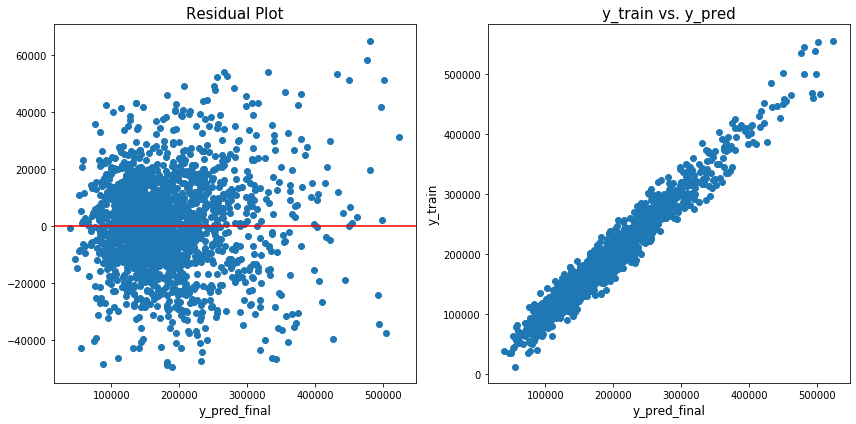

In [19]:
# Plot the Y and Residual
plt.figure(figsize=(12,6))

# Residual Plot
plt.subplot(121)
plt.scatter(y_pred_reversed, residual)
plt.axhline(0, c='red')
plt.title('Residual Plot', size=15)
plt.xlabel('y_pred_final', size=12)

# y_train vs. y_pred
plt.subplot(122)
plt.scatter(y_pred_reversed, y)
plt.title('y_train vs. y_pred', size=15)
plt.xlabel('y_pred_final', size=12)
plt.ylabel('y_train', size=12)
plt.tight_layout();

In [20]:
# Calculate the MSE
MSE = np.sqrt((residual**2).mean())
print(f'MSE for LASSO Regression is {MSE}')

MSE for LASSO Regression is 15819.9975568731


### 4.7 Analysis

In [21]:
# save residuals as variable and check the values
df_resid = residual.reset_index()
df_resid[0].sort_values().head()

226    -49149.430096
1141   -48550.973403
399    -48263.159968
8      -47575.829697
1450   -47080.658736
Name: 0, dtype: float64

In [22]:
# Found residual > 50,000
df_resid[~df_resid[0].between(-50000, 50000)].index

Int64Index([69, 80, 136, 609, 897, 1372, 1556, 1660, 1698], dtype='int64')

### 4.8 Prepare for Kaggle Submission

In [23]:
# Calculate the y_exam_pred: inverse the log transformation.
y_exam_pred = lasso.predict(X_exam_sc)
y_exam_reversed = pt_y.inverse_transform(y_exam_pred.reshape(-1,1))
y_exam_reversed = pd.Series([y_exam_reversed[i][0] for i in range(len(y_exam_reversed))])

In [24]:
# Format and Output
kaggle_submit = pd.DataFrame({'id': X_te['id'], 'saleprice': y_exam_reversed})
kaggle_submit.to_csv('lasso_regression_no_ttsplit_PowerTrans_v15.csv', index = False)